In [1]:
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt

In [111]:
os.chdir("C:\\Users\\myhyu\\Onedrive\\Desktop\\BAF\\2024-1 project\서울시_길단위 자전거 통행 안정성 지수")
os.getcwd()

'C:\\Users\\myhyu\\Onedrive\\Desktop\\BAF\\2024-1 project\\서울시_길단위 자전거 통행 안정성 지수'

# 서울시_길단위 자전거 통행 안정성 지수

시도코드	MEGA_CD  
시도명	MEGA_NM  
시군구코드	CTY_CD  
시군구명	CTY_NM  
도로명	RD_NM  
도로번호	ID  
도로길이	LENGTH  
지수	GRADE   
형상정보	geometry  

In [61]:
#데이터 불러오기
df = pd.read_csv("서울시_길단위 자전거 통행 안정성 지수.csv",encoding='utf-8')
df['GRADE'] = df['GRADE'].astype(int)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48582 entries, 0 to 48581
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   MEGA_CD   48582 non-null  int64  
 1   MEGA_NM   48582 non-null  object 
 2   CTY_CD    48582 non-null  int64  
 3   CTY_NM    48582 non-null  object 
 4   RD_NM     48582 non-null  object 
 5   ID        48582 non-null  int64  
 6   LENGTH    48582 non-null  float64
 7   GRADE     48582 non-null  int32  
 8   geometry  48582 non-null  object 
dtypes: float64(1), int32(1), int64(3), object(4)
memory usage: 3.2+ MB


In [62]:
df.head()

,MEGA_CD,MEGA_NM,CTY_CD,CTY_NM,RD_NM,ID,LENGTH,GRADE,geometry
0,11,서울특별시,1130,강북구,4.19로,0,98.038188,3,LINESTRING (313206.69854889787 561112.60635351...
1,11,서울특별시,1130,강북구,4.19로,1,37.449046,-999,LINESTRING (313112.596899341 561085.6052961956...
2,11,서울특별시,1130,강북구,4.19로,2,213.893731,4,LINESTRING (313076.8756479398 561074.364445715...
3,11,서울특별시,1130,강북구,4.19로,3,98.159833,5,LINESTRING (312871.84882797627 561013.53077388...
4,11,서울특별시,1130,강북구,4.19로,4,18.095951,-999,LINESTRING (312778.26309284946 560985.39613543...


In [63]:
df.isna().sum()

MEGA_CD     0
MEGA_NM     0
CTY_CD      0
CTY_NM      0
RD_NM       0
ID          0
LENGTH      0
GRADE       0
geometry    0
dtype: int64

## 'GRADE' : 안정성 지수
- 1~5로 나뉨
- 결측치 : -999가 굉장히 많음

In [96]:
grade_counts = df.GRADE.value_counts().sort_index()
print(grade_counts.transpose())

GRADE
-999    34958
 1       2727
 2       3900
 3       1661
 4       2640
 5       2696
Name: count, dtype: int64


'GRADE'에 결측치 존재 : -999

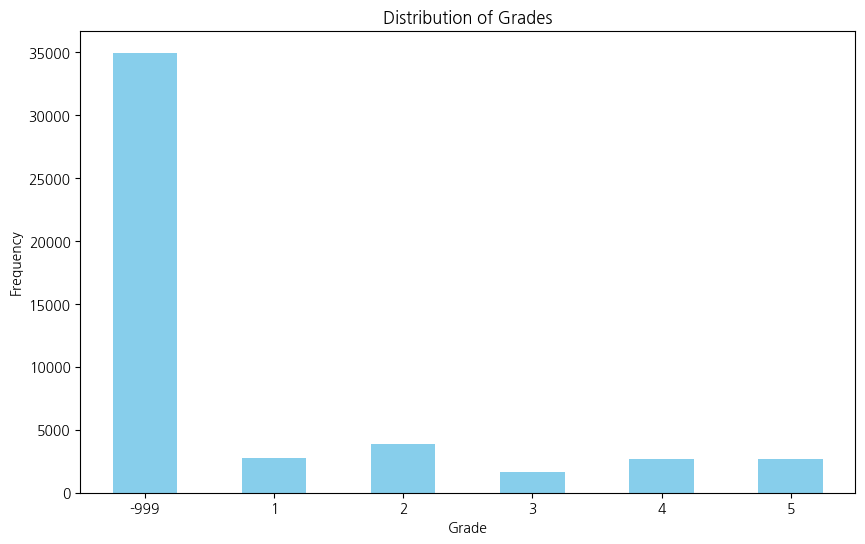

In [66]:
plt.figure(figsize=(10, 6))
grade_counts.plot(kind='bar', color='skyblue')
plt.title('Distribution of Grades')
plt.xlabel('Grade')
plt.ylabel('Frequency')
plt.xticks(rotation=0)
plt.show()

---
## df2 
원본데이터에서 GRADE 결측 행을 모두 삭제

In [104]:
# GRADE가 -999인 행을 제외한 데이터프레임 생성
df2 = df[df['GRADE'] != -999.0]
df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 13624 entries, 0 to 48509
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   MEGA_CD   13624 non-null  int64  
 1   MEGA_NM   13624 non-null  object 
 2   CTY_CD    13624 non-null  int64  
 3   CTY_NM    13624 non-null  object 
 4   RD_NM     13624 non-null  object 
 5   ID        13624 non-null  int64  
 6   LENGTH    13624 non-null  float64
 7   GRADE     13624 non-null  int32  
 8   geometry  13624 non-null  object 
dtypes: float64(1), int32(1), int64(3), object(4)
memory usage: 1011.2+ KB


In [105]:
# df2의 자치구별 안정성 지수 존재 도로 재수
print(df2.CTY_NM.value_counts())

CTY_NM
영등포구    1188
강남구     1111
강북구     1098
송파구     1054
강서구      741
성동구      736
마포구      731
동작구      709
구로구      595
관악구      553
양천구      552
서초구      523
동대문구     486
강동구      473
성북구      425
광진구      406
용산구      388
금천구      341
중랑구      333
서대문구     264
종로구      248
중구       231
은평구      194
노원구      157
도봉구       87
Name: count, dtype: int64


In [69]:
# df2/df 
# 자치구별 안정성 지수가 존재햐는 도로 비율

df2.CTY_NM.value_counts()/df.CTY_NM.value_counts()

CTY_NM
강남구     0.342478
강동구     0.281046
강북구     0.551482
강서구     0.350189
관악구     0.213349
광진구     0.195568
구로구     0.393258
금천구     0.333008
노원구     0.115441
도봉구     0.069936
동대문구    0.180133
동작구     0.345685
마포구     0.293221
서대문구    0.240218
서초구     0.216205
성동구     0.429405
성북구     0.179174
송파구     0.419586
양천구     0.353846
영등포구    0.441964
용산구     0.193323
은평구     0.218223
종로구     0.141876
중구      0.146203
중랑구     0.174437
Name: count, dtype: float64

---
## grade_counts
df2에서 자치구 별, GRADE별 도로 개수

In [92]:
grade_counts = {}

for i in range(5):
    grade_counts['g'+str(i+1)] = df2[df2.GRADE==i+1]['CTY_NM'].value_counts()
    
grade_counts = pd.DataFrame(grade_counts)
print(grade_counts)

         g1   g2   g3   g4   g5
CTY_NM                         
강남구     223  372  129  215  172
강동구     116  154   41   96   66
강북구     194  264  158  211  271
강서구     153  180  103  113  192
관악구     133  127   77   85  131
광진구      85  145   56   71   49
구로구      70  192   92  125  116
금천구      61   76   31   60  113
노원구      56   65    8   17   11
도봉구      16   45    9   12    5
동대문구    128  171   42   95   50
동작구     127  209  106  148  119
마포구     197  165   76  139  154
서대문구     52   81   23   50   58
서초구      68  156   83  132   84
성동구     102  211   51  129  243
성북구     113  130   51   83   48
송파구     142  227  146  239  300
양천구     130  118   65   98  141
영등포구    193  332  138  283  242
용산구      84  132   49   76   47
은평구      39   72   23   40   20
종로구      69   94   30   40   15
중구       71   75   29   38   18
중랑구     105  107   45   45   31


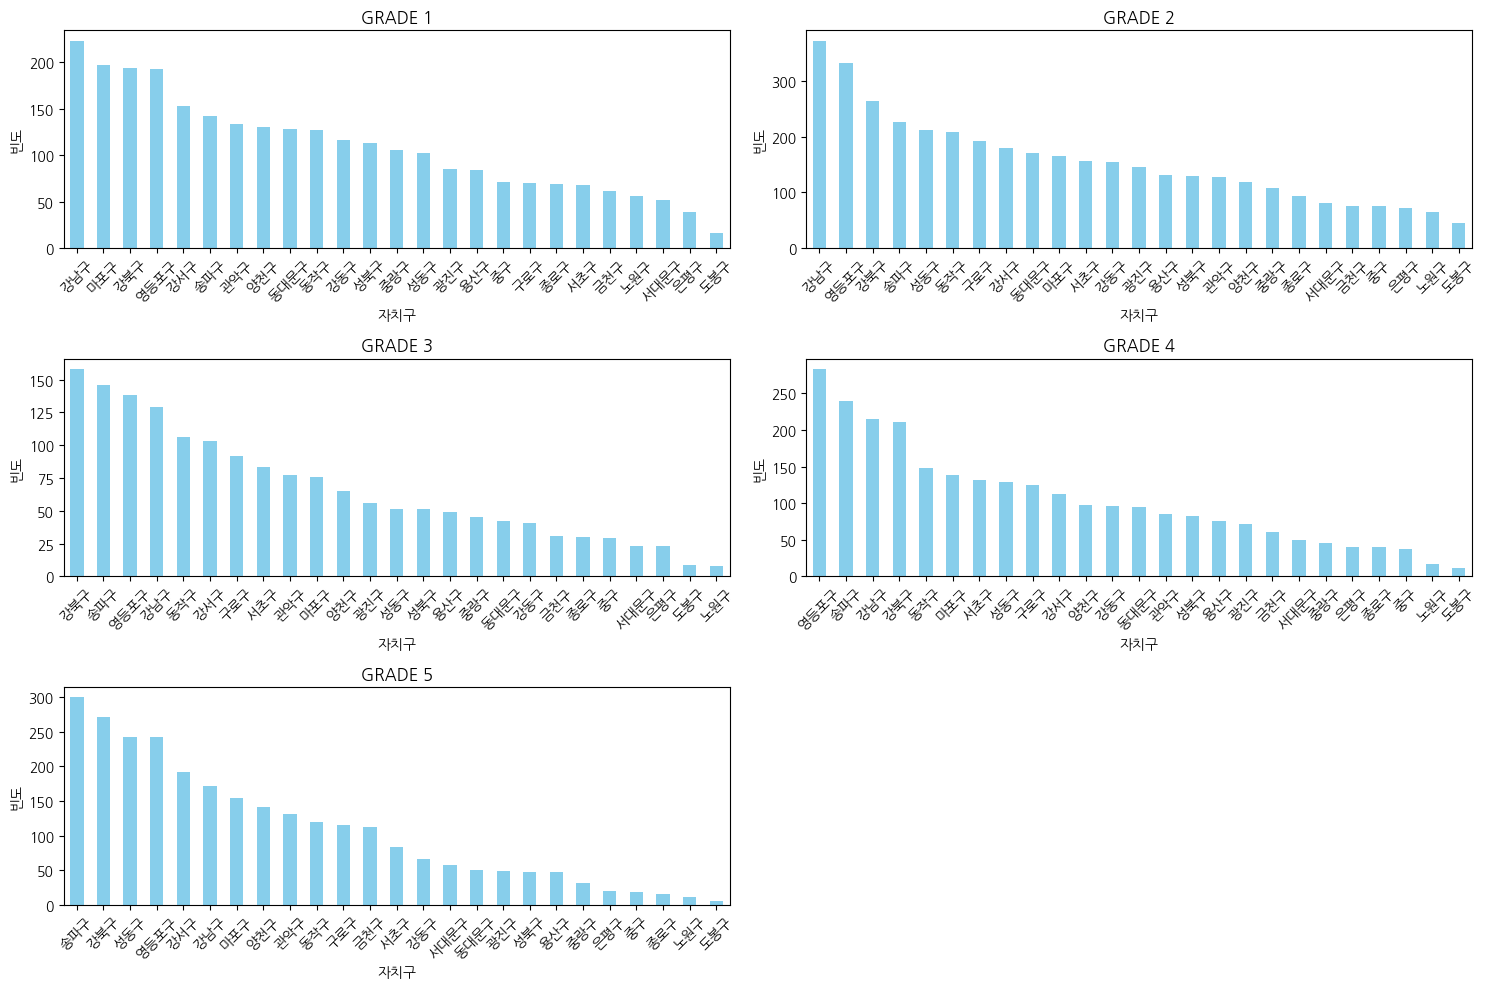

In [93]:
# 자치구별, 지수별 시각화
plt.rcParams['font.family'] = 'NanumGothic'

plt.figure(figsize=(15, 10))
for i in range(5):
    plt.subplot(3, 2, i+1)
    grade_counts['g'+str(i+1)].sort_values(ascending=False).plot(kind='bar', color='skyblue')
    plt.title('GRADE {}'.format(i+1))
    plt.xlabel('자치구')
    plt.ylabel('빈도')
    plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

## grade_sum : 새로운 지수 'SUM'  
 - '자치구'별로 'GRADE'*'해당 GRADE의 개수 합'의 sum을 계산

In [72]:
grade_sum = df2.groupby('CTY_NM')['GRADE'].sum().reset_index()
grade_sum.rename(columns={'GRADE': 'SUM'}, inplace=True)

print(grade_sum)

   CTY_NM   SUM
0     강남구  3074
1     강동구  1261
2     강북구  3395
3     강서구  2234
4     관악구  1613
5     광진구  1072
6     구로구  1810
7     금천구  1111
8     노원구   333
9     도봉구   206
10   동대문구  1226
11    동작구  2050
12    마포구  2081
13   서대문구   773
14    서초구  1577
15    성동구  2408
16    성북구  1098
17    송파구  3490
18    양천구  1658
19   영등포구  3613
20    용산구  1034
21    은평구   512
22    종로구   582
23     중구   550
24    중랑구   789


In [73]:
grade_sum_sorted = grade_sum.sort_values(by='SUM', ascending=False)
grade_sum_sorted

,CTY_NM,SUM
19,영등포구,3613
17,송파구,3490
2,강북구,3395
0,강남구,3074
15,성동구,2408
3,강서구,2234
12,마포구,2081
11,동작구,2050
6,구로구,1810
18,양천구,1658


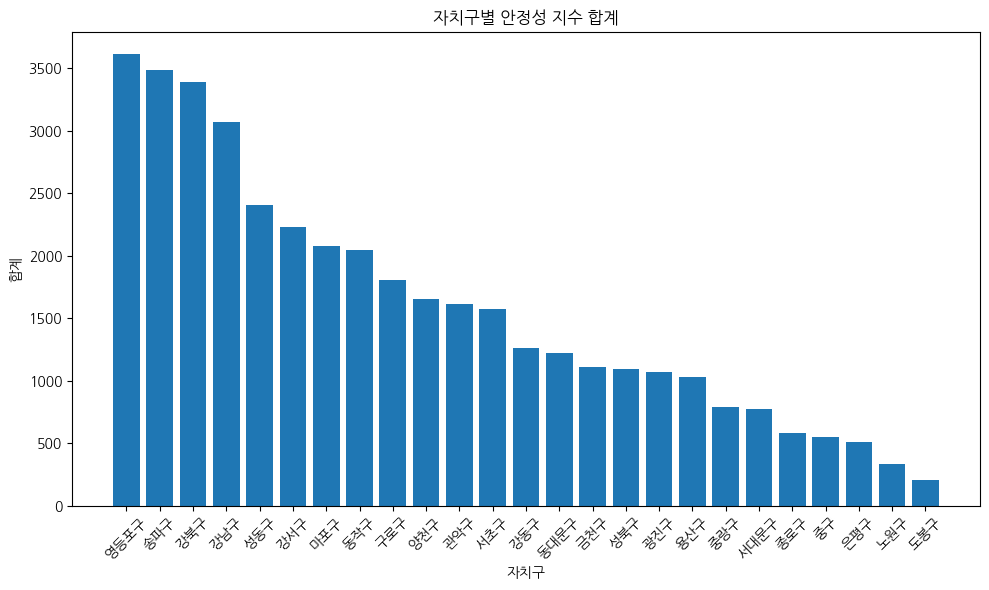

In [74]:
plt.figure(figsize=(10, 6))
plt.bar(grade_sum_sorted['CTY_NM'], grade_sum_sorted['SUM'])
plt.xlabel('자치구')
plt.ylabel('합계')
plt.title('자치구별 안정성 지수 합계')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
## 'SUM/COUNTS' = 'SUM' / '각 자치구별 도로개수'
자치구마다 결측치가 다르고, 원래 도로의 개수가 다르기 때문에 이를 보정  
'SUM/COUNTS' 지수를 통해 각 자치구별로 도로별 안정성을 추정할 수 있음.

In [75]:
df2.CTY_NM.value_counts().sort_index()

CTY_NM
강남구     1111
강동구      473
강북구     1098
강서구      741
관악구      553
광진구      406
구로구      595
금천구      341
노원구      157
도봉구       87
동대문구     486
동작구      709
마포구      731
서대문구     264
서초구      523
성동구      736
성북구      425
송파구     1054
양천구      552
영등포구    1188
용산구      388
은평구      194
종로구      248
중구       231
중랑구      333
Name: count, dtype: int64

In [76]:
grade_sum['SUM/COUNTS'] = grade_sum['SUM']/df2.CTY_NM.value_counts().sort_index().values
grade_sum = grade_sum.sort_values(by='SUM/COUNTS', ascending=False)
grade_sum

,CTY_NM,SUM,SUM/COUNTS
17,송파구,3490,3.311195
15,성동구,2408,3.271739
7,금천구,1111,3.258065
2,강북구,3395,3.091985
6,구로구,1810,3.042017
19,영등포구,3613,3.041246
14,서초구,1577,3.015296
3,강서구,2234,3.014845
18,양천구,1658,3.003623
13,서대문구,773,2.928030


ValueError: Unable to determine Axes to steal space for Colorbar. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.

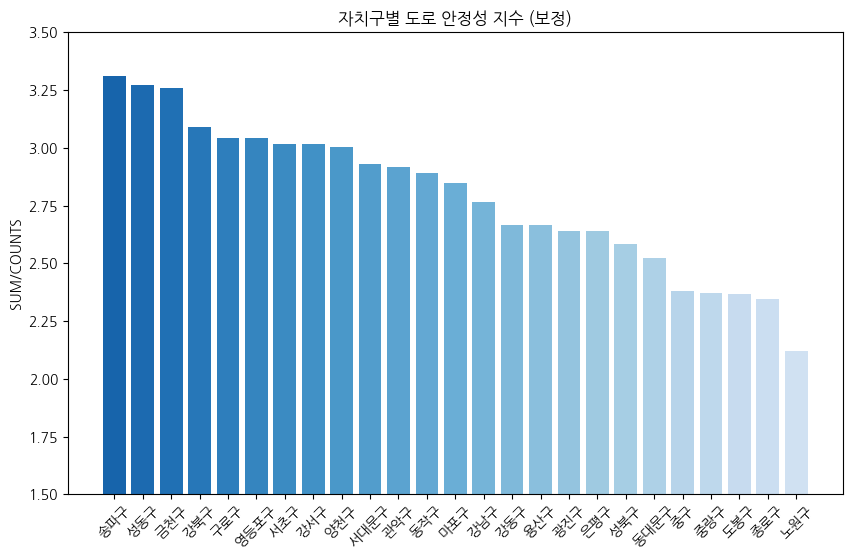

In [89]:
# plt.bar(grade_sum['CTY_NM'], grade_sum['SUM/COUNTS'], color=1:25)
colors = plt.cm.Blues(np.linspace(0.8, 0.2, len(grade_sum)))

plt.figure(figsize=(10,6))
bars = plt.bar(grade_sum['CTY_NM'], grade_sum['SUM/COUNTS'], color=colors)

plt.title('자치구별 도로 안정성 지수 (보정)')
plt.xticks(rotation=45)
plt.ylim(1.5,3.5)
plt.ylabel('SUM/COUNTS')

plt.colorbar(bars)
plt.show()

In [98]:
grade_sum.to_csv("자전거 통행 안정성 지수_자치구별.csv", encoding='cp949')